<a href="https://colab.research.google.com/github/balszeg/Deep_learning_uniproject/blob/main/hyperopt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git
!git clone https://github.com/agchung/Figure1-COVID-chestxray-dataset.git
!git clone https://github.com/agchung/Actualmed-COVID-chestxray-dataset.git

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 3622 (delta 3), reused 2 (delta 0), pack-reused 3614
Receiving objects: 100% (3622/3622), 632.88 MiB | 21.43 MiB/s, done.
Resolving deltas: 100% (1436/1436), done.
Checking out files: 100% (1173/1173), done.
Cloning into 'Figure1-COVID-chestxray-dataset'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 112 (delta 28), reused 95 (delta 14), pack-reused 0
Receiving objects: 100% (112/112), 14.13 MiB | 6.62 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Cloning into 'Actualmed-COVID-chestxray-dataset'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 422 (delta 1), reused 6 (delta 1), pack-reused 412
Re

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import csv
import tensorflow as tf
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
import numpy as np
from IPython.display import clear_output

In [ ]:
x_raw_name=[] # the names of the pictures
y_label=[] # pcr test: True=+, False=-
images = [] # array for the actual images
count = 0

In [ ]:
image_path = '/content/covid-chestxray-dataset/images'
image_names=os.listdir(image_path)

count = 0

with open('/content/covid-chestxray-dataset/metadata.csv') as csv_file: #load the csv from the session storage
    csv_reader = csv.reader(csv_file, delimiter=',') # ',' is the separating character
    line_count = 0 # line counter
    for row in csv_reader:
        if row[23] in image_names: # check if we have the x-ray image for this diagnosis
            if row[5]=='': # negative covid test
                y_label.append(False)
            if row[5]=='Y': #positive covid test
                y_label.append(True)
            if row[5]=='Y' or row[5]=='':
                x_raw_name.append(row[23])
                img = cv2.imread(image_path + '/' + x_raw_name[-1],0) # load the image
                img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA) # resize the image to 224*224
                images.append(img)
                count += 1
          
print(f'{count} examples')

719 examples


In [ ]:
image_path = '/content/Figure1-COVID-chestxray-dataset/images'
image_names=os.listdir(image_path)

count = 0

with open('/content/Figure1-COVID-chestxray-dataset/metadata.csv', encoding='latin1') as csv_file: #load the csv from the session storage
    csv_reader = csv.reader(csv_file, delimiter=',') # ',' is the separating character
    line_count = 0 # line counter
    for row in csv_reader:
        if (row[0]+'.jpg') in image_names: # check if we have the x-ray image for this diagnosis
            if row[4]=='COVID-19': #positive covid test
                y_label.append(True)
            else: # negative covid test
                y_label.append(False)
            x_raw_name.append(row[0]+'.jpg')
            img = cv2.imread(image_path + '/' + x_raw_name[-1],0) # load the image
            img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA) # resize the image to 224*224
            images.append(img)
            count += 1

print(f'{count} examples')

50 examples


In [ ]:
image_path = '/content/Actualmed-COVID-chestxray-dataset/images'
image_names=os.listdir(image_path)

count = 0

with open('/content/Actualmed-COVID-chestxray-dataset/metadata.csv') as csv_file: #load the csv from the session storage
    csv_reader = csv.reader(csv_file, delimiter=',') # ',' is the separating character
    line_count = 0 # line counter
    for row in csv_reader:
        if row[10] in image_names: # check if we have the x-ray image for this diagnosis
            if row[4]=='COVID-19': #positive covid test
                y_label.append(True)
            else: # negative covid test
                y_label.append(False)
            x_raw_name.append(row[10])
            img = cv2.imread(image_path + '/' + x_raw_name[-1],0) # load the image
            img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA) # resize the image to 224*224
            images.append(img)
            count += 1

print(f'{count} examples')

238 examples


In [ ]:
images = np.asarray(images)
y_label = np.asarray(y_label)

In [ ]:
normalized = images.astype(float)
for i in range(len(normalized)):
  normalized[i] = normalized[i]/255

In [ ]:
triplechanel=np.zeros([len(normalized[:,0,0]),len(normalized[0,:,0]),len(normalized[0,0,:]),3])
triplechanel[:,:,:,0], triplechanel[:,:,:,1], triplechanel[:,:,:,2] = normalized, normalized, normalized
x_train, x_2, y_train, y_2 = train_test_split(triplechanel, y_label, test_size=0.3, shuffle=True)
x_valid, x_test, y_valid, y_test = train_test_split(x_2, y_2, test_size=0.33, shuffle=True)

In [ ]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(704, 224, 224, 3)
(203, 224, 224, 3)
(100, 224, 224, 3)
(704,)
(203,)
(100,)


In [ ]:
with open('covid-hyperas-log.csv', 'w') as csv_file:
  csv_file.write('act' + ',')
  csv_file.write('pooling' + ',')
  csv_file.write('layer1' + ',')
  csv_file.write('layer2' + ',')
  csv_file.write('batchsize' + ',')
  csv_file.write('optim' + ',')
  csv_file.write('best_val_acc' + '\n')

In [ ]:
!pip3 install hyperas
!pip3 install hyperopt

In [ ]:
def data():
  x_raw_name=[]
  y_label=[]
  images = []

  image_path = '/content/covid-chestxray-dataset/images'
  image_names=os.listdir(image_path)
  with open('/content/covid-chestxray-dataset/metadata.csv') as csv_file: #load the csv from the session storage
      csv_reader = csv.reader(csv_file, delimiter=',') # ',' is the separating character
      line_count = 0 # line counter
      for row in csv_reader:
          if row[23] in image_names: # check if we have the x-ray image for this diagnosis
              if row[5]=='': # negative covid test
                  y_label.append(False)
              if row[5]=='Y': #positive covid test
                  y_label.append(True)
              if row[5]=='Y' or row[5]=='':
                  x_raw_name.append(row[23])
                  img = cv2.imread(os.path.join(image_path, x_raw_name[-1]),0) # load the image
                  img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA) # resize the image to 224*224
                  images.append(img)
  
  image_path = '/content/Figure1-COVID-chestxray-dataset/images'
  image_names=os.listdir(image_path)
  with open('/content/Figure1-COVID-chestxray-dataset/metadata.csv', encoding='latin1') as csv_file: #load the csv from the session storage
      csv_reader = csv.reader(csv_file, delimiter=',') # ',' is the separating character
      line_count = 0 # line counter
      for row in csv_reader:
          if (row[0]+'.jpg') in image_names: # check if we have the x-ray image for this diagnosis
              if row[4]=='COVID-19': #positive covid test
                  y_label.append(True)
              else: # negative covid test
                  y_label.append(False)
              x_raw_name.append(row[0]+'.jpg')
              img = cv2.imread(os.path.join(image_path, x_raw_name[-1]),0) # load the image
              img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA) # resize the image to 224*224
              images.append(img)

  image_path = '/content/Actualmed-COVID-chestxray-dataset/images'
  image_names=os.listdir(image_path)
  with open('/content/Actualmed-COVID-chestxray-dataset/metadata.csv') as csv_file: #load the csv from the session storage
      csv_reader = csv.reader(csv_file, delimiter=',') # ',' is the separating character
      line_count = 0 # line counter
      for row in csv_reader:
          if row[10] in image_names: # check if we have the x-ray image for this diagnosis
              if row[4]=='COVID-19': #positive covid test
                  y_label.append(True)
              else: # negative covid test
                  y_label.append(False)
              x_raw_name.append(row[10])
              img = cv2.imread(os.path.join(image_path, x_raw_name[-1]),0) # load the image
              img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA) # resize the image to 224*224
              images.append(img)
  
  images = np.asarray(images)
  y_label = np.asarray(y_label)

  normalized = images.astype(float)
  for i in range(len(normalized)):
    normalized[i] = normalized[i]/255

  triplechanel=np.zeros([len(normalized[:,0,0]),len(normalized[0,:,0]),len(normalized[0,0,:]),3])
  triplechanel[:,:,:,0], triplechanel[:,:,:,1], triplechanel[:,:,:,2] = normalized, normalized, normalized
  x_train, x_2, y_train, y_2 = train_test_split(triplechanel, y_label, test_size=0.3, shuffle=True)
  x_valid, x_test, y_valid, y_test = train_test_split(x_2, y_2, test_size=0.33, shuffle=True)

  return x_train, y_train, x_test, y_test

In [ ]:
def create_model():
  baseModel = tf.keras.applications.VGG19(weights="imagenet", include_top=False, input_tensor=tf.keras.layers.Input(shape=(224, 224, 3)))
  output = baseModel.output

  act = {{choice(['relu', 'leakyrelu'])}}
  if act == 'relu':
      activation = keras.layers.ReLU()
  elif act == 'leakyrelu':
      activation = keras.layers.LeakyReLU()

  pooling = {{choice([True, False])}}
  if pooling:
      output = tf.keras.layers.AveragePooling2D(pool_size=(2, 2))(output)
  
  output = tf.keras.layers.Flatten(name="flatten")(output)

  layer1 = {{choice([256, 512, 1024])}}
  output = tf.keras.layers.Dense(layer1, activation=activation)(output)

  output = tf.keras.layers.Dropout(0.5)(output)

  layer2 = {{choice([256, 512, 1024])}}
  output = tf.keras.layers.Dense(layer2, activation=activation)(output)

  output = tf.keras.layers.Dropout(0.5)(output)

  output = tf.keras.layers.Dense(1, activation="sigmoid")(output)

  model = tf.keras.Model(inputs=baseModel.input, outputs=output)
  for layer in baseModel.layers:
    layer.trainable = False
  
  EPOCHS = 40

  batchsize = {{choice([16, 32, 64])}}

  optim = {{choice(['adam', 'sgd'])}}

  model.compile(loss="binary_crossentropy", optimizer=optim, metrics=["accuracy"])

  callbacks = [EarlyStopping(monitor='val_accuracy', patience=3, verbose=0)]

  STEP_TRAIN = len(x_train) // batchsize
  STEP_VALID = len(x_valid) // batchsize
  
  result = model.fit(x_train, y_train, batch_size=batchsize, epochs=EPOCHS, verbose=1,
                         validation_data=(x_valid, y_valid), shuffle = True, steps_per_epoch=STEP_TRAIN, validation_steps=STEP_VALID,callbacks=callbacks)
  
  best_val_acc = np.amax(result.history['val_accuracy'])

  with open('covid-hyperas-log.csv', 'a') as csv_file:
      csv_file.write(str(act) + ',')
      csv_file.write(str(pooling) + ',')
      csv_file.write(str(layer1) + ',')
      csv_file.write(str(layer2) + ',')
      csv_file.write(str(batchsize) + ',')
      csv_file.write(str(optim) + ',')
      csv_file.write(str(best_val_acc) + '\n')

  return {'loss': -best_val_acc, 'status': STATUS_OK, 'model': model}

In [ ]:
import hyperas
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

In [ ]:
best_run, best_model = optim.minimize(model=create_model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=100,
                                          notebook_name='hyperas_covid_def',
                                          trials=Trials())

>>> Imports:
#coding=utf-8

try:
    import os
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import cv2
except:
    pass

try:
    import csv
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    import keras
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
except:
    pass

try:
    from keras.callbacks import EarlyStopping
except:
    pass

try:
    import numpy as np
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'layer1': hp.choice('layer1', [256, 512]),
        'layer1_1': hp.choice('layer1_1', [256, 512]),
    }

>>> Data
   1: 
   2: x_raw_name=[]
   3: y_label=[]
   4: images = []
   5: 
   6: image_path = '/content/covid-chestxray-da

/usr/local/lib/python3.6/dist-packages/hyperas/utils.py:149: UserWarning: Inconsistent indentation detected.Found "  " (length: 2) as well as "    " (length: 4)
  indent, len(indent), new_indent, len(new_indent)))
/usr/local/lib/python3.6/dist-packages/hyperas/utils.py:149: UserWarning: Inconsistent indentation detected.Found "    " (length: 4) as well as "  " (length: 2)
  indent, len(indent), new_indent, len(new_indent)))


Epoch 1/40
 1/22 [>.............................]
 - ETA: 0s - loss: 0.8621 - accuracy: 0.5625

 2/22 [=>............................]
 - ETA: 0s - loss: 0.9208 - accuracy: 0.5469
  0%|          | 0/40 [00:11<?, ?it/s, best loss: ?]WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0156s vs `on_train_batch_end` time: 0.0492s). Check your callbacks.

 3/22 [===>..........................]
 - ETA: 0s - loss: 0.8739 - accuracy: 0.5729

 4/22 [====>.........................]
 - ETA: 0s - loss: 1.0008 - accuracy: 0.5547

 5/22 [=====>........................]
 - ETA: 0s - loss: 1.0372 - accuracy: 0.5500


In [ ]:
import pandas
hyperas_log = pandas.read_csv('covid-hyperas-log.csv', delimiter=',')
hyperas_best5 = hyperas_log.sort_values(by=['best_val_acc'], ascending=False).head(n=5)
hyperas_best5

,act,pooling,layer1,layer2,batchsize,optim,best_val_acc
59,relu,False,1024,256,32,adam,0.786458
1,leakyrelu,True,256,512,64,adam,0.781250
9,relu,False,256,512,64,adam,0.776042
4,leakyrelu,False,1024,1024,32,adam,0.776042
40,relu,True,256,512,64,adam,0.765625


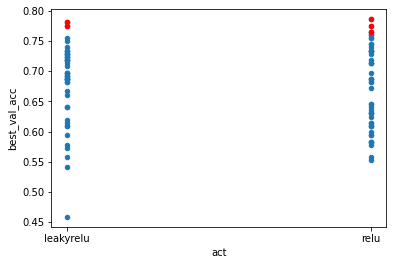

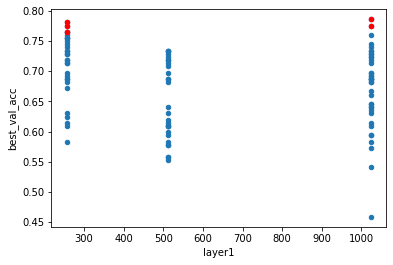

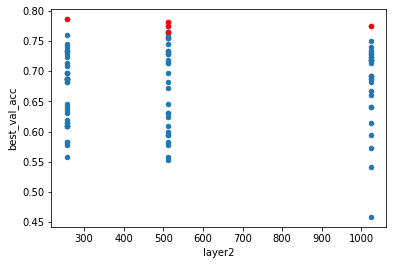

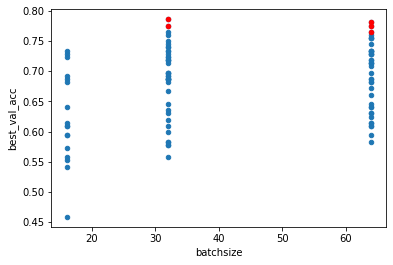

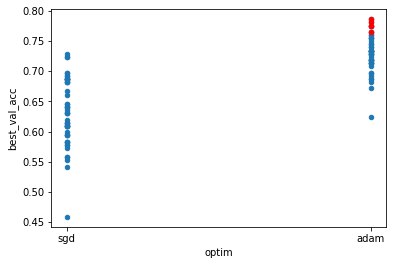

In [ ]:
import matplotlib.pyplot as plt
for hyperparam in ['act', 'layer1', 'layer2', 'batchsize', 'optim']:
  ax1 = hyperas_log.plot(kind='scatter', x=hyperparam, y='best_val_acc')
  hyperas_best5.plot(kind='scatter', x=hyperparam, y='best_val_acc', color='red', ax=ax1)

(3.5, -0.5)

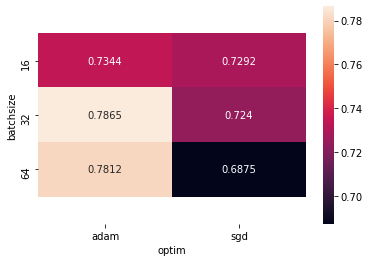

In [ ]:
import seaborn as sns
max_val_acc = hyperas_log.groupby(['batchsize', 'optim']).max()
max_val_acc = max_val_acc.unstack()[['best_val_acc']]
sns.heatmap(max_val_acc.best_val_acc, annot=True, fmt='.4g');
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)